# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define units as metric
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng =  city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | zalaegerszeg
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | kyzyl
Processing Record 10 of Set 1 | teshi old town
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | nenjiang
Processing Record 13 of Set 1 | oyama
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | mandapam
Processing Record 16 of Set 1 | saurimo
Processing Record 17 of Set 1 | qamdo
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | nyurba
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | uturoa
Processing Record 22 of Set 1 | s

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.76,77,69,10.68,SH,1713334065
1,port-aux-francais,-49.3500,70.2167,3.45,69,97,12.36,TF,1713334066
2,karratha,-20.7377,116.8463,33.78,24,82,6.88,AU,1713334066
3,bredasdorp,-34.5322,20.0403,18.54,72,0,2.33,ZA,1713334067
4,northam,51.0333,-4.2167,7.56,79,49,8.14,GB,1713334068


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.76,77,69,10.68,SH,1713334065
1,port-aux-francais,-49.3500,70.2167,3.45,69,97,12.36,TF,1713334066
2,karratha,-20.7377,116.8463,33.78,24,82,6.88,AU,1713334066
3,bredasdorp,-34.5322,20.0403,18.54,72,0,2.33,ZA,1713334067
4,northam,51.0333,-4.2167,7.56,79,49,8.14,GB,1713334068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

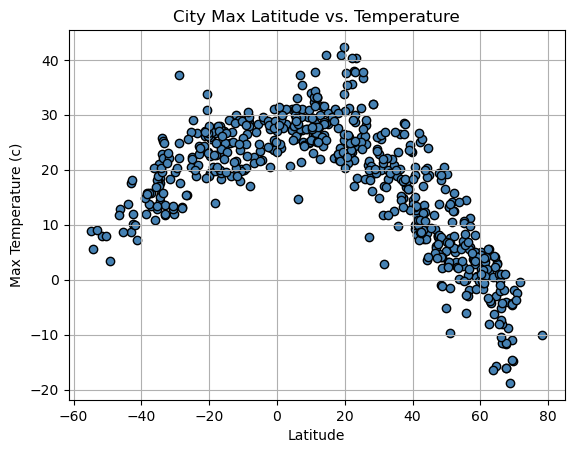

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.title ('City Max Latitude vs. Temperature') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

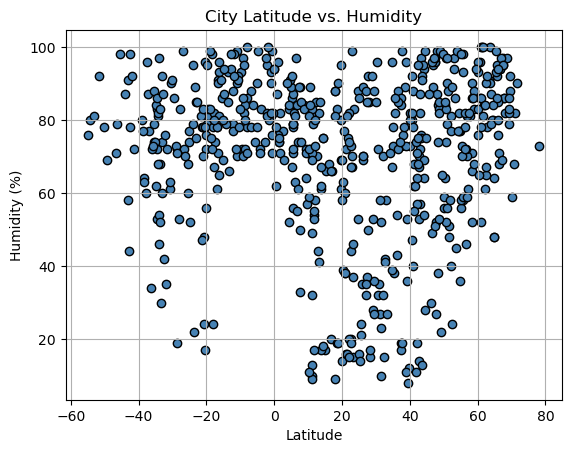

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('City Latitude vs. Humidity') 
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

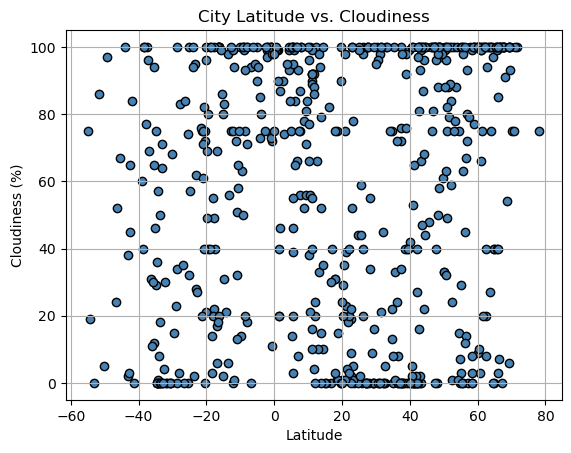

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('City Latitude vs. Cloudiness') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

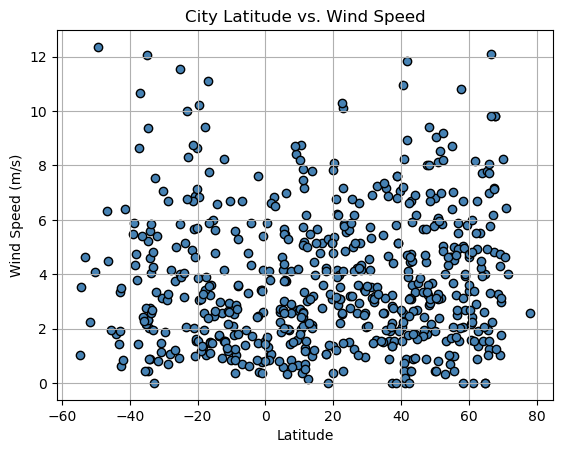

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, color='steelblue', edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title ('City Latitude vs. Wind Speed') 
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # Calculate the line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Plot the scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_label)  # Set the y-axis label dynamically
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,northam,51.0333,-4.2167,7.56,79,49,8.14,GB,1713334068
5,zalaegerszeg,46.8400,16.8439,6.05,89,100,2.42,HU,1713334068
6,hawaiian paradise park,19.5933,-154.9731,21.73,95,100,3.09,US,1713334069
8,kyzyl,51.7000,94.4500,10.57,51,79,3.13,RU,1713334069
9,teshi old town,5.5836,-0.1072,27.49,79,100,3.02,GH,1713334070


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.76,77,69,10.68,SH,1713334065
1,port-aux-francais,-49.3500,70.2167,3.45,69,97,12.36,TF,1713334066
2,karratha,-20.7377,116.8463,33.78,24,82,6.88,AU,1713334066
3,bredasdorp,-34.5322,20.0403,18.54,72,0,2.33,ZA,1713334067
7,puerto ayora,-0.7393,-90.3518,23.64,99,72,2.60,EC,1713334069


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7771617822760665


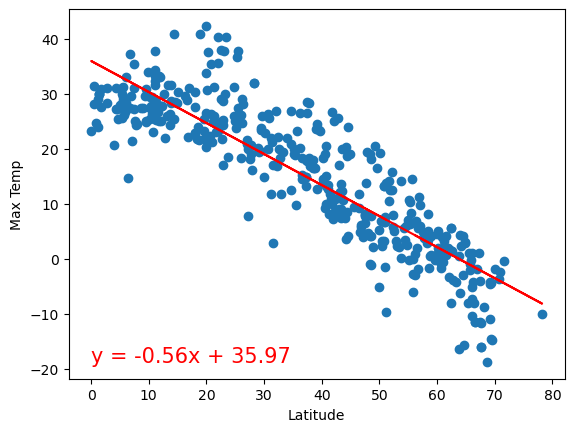

In [52]:
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Max Temp']
plot_linear_regression(x_values_northern, y_values_northern, "Max Temp")

The r-value is: 0.5282669049145701


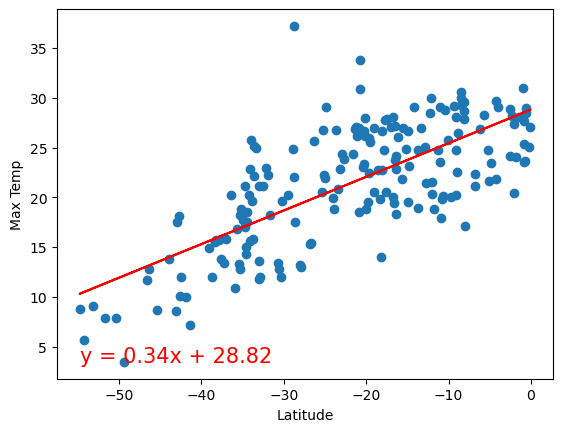

In [55]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Max Temp']
plot_linear_regression(x_values_southern, y_values_southern, "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05429972648142856


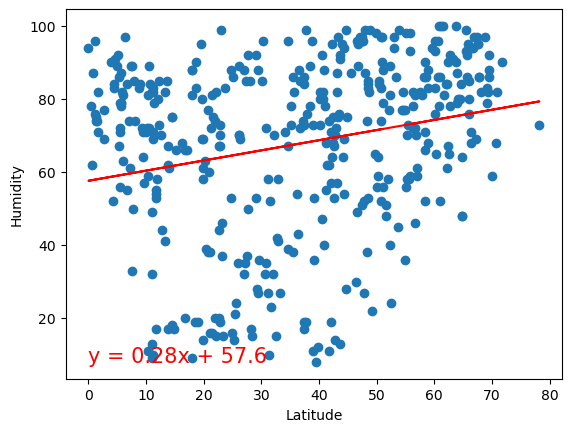

In [56]:
# Northern Hemisphere
# YOUR CODE HERE
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Humidity']
plot_linear_regression(x_values_northern, y_values_northern,"Humidity")

The r-value is: 0.057748407682693306


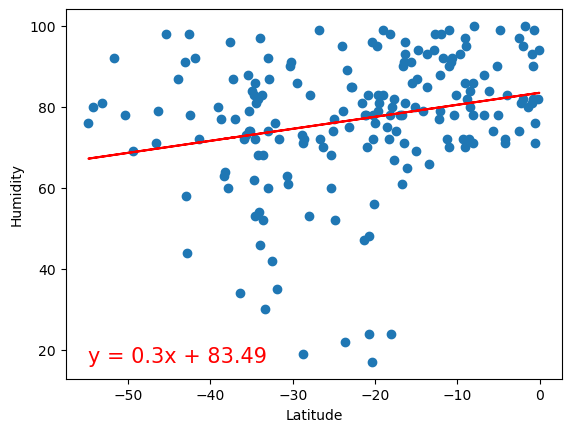

In [57]:
# Southern Hemisphere
# YOUR CODE HERE
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Humidity']
plot_linear_regression(x_values_southern, y_values_southern, "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.013481209963400064


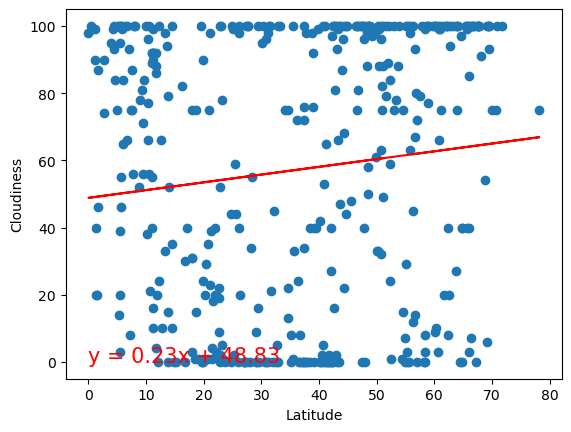

In [58]:
# Northern Hemisphere
# YOUR CODE HERE
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values_northern, y_values_northern,"Cloudiness")

The r-value is: 0.13777053054703303


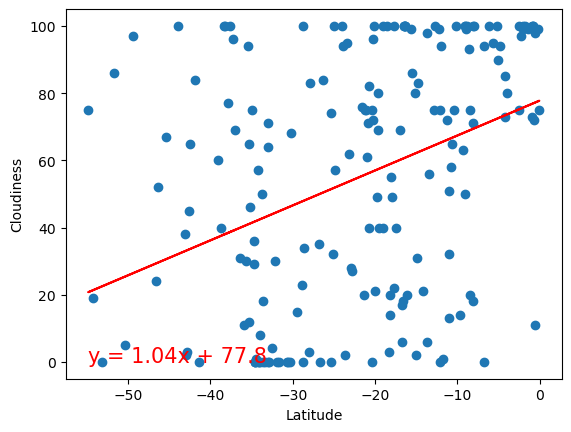

In [59]:
# Southern Hemisphere
# YOUR CODE HERE
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values_southern, y_values_southern, "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01382477884886579


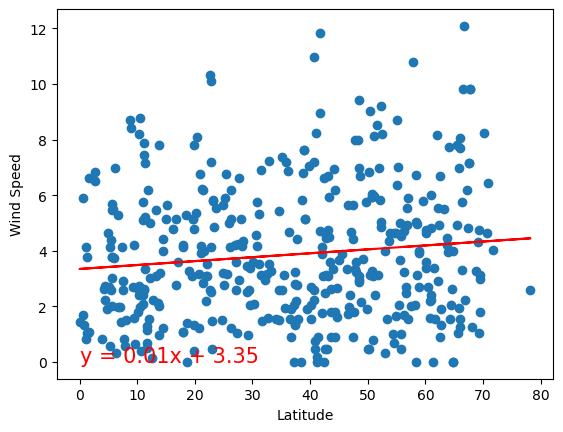

In [60]:
# Northern Hemisphere
# YOUR CODE HERE
x_values_northern = northern_hemi_df['Lat']
y_values_northern = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values_northern, y_values_northern,"Wind Speed")

The r-value is: 0.02164460366643039


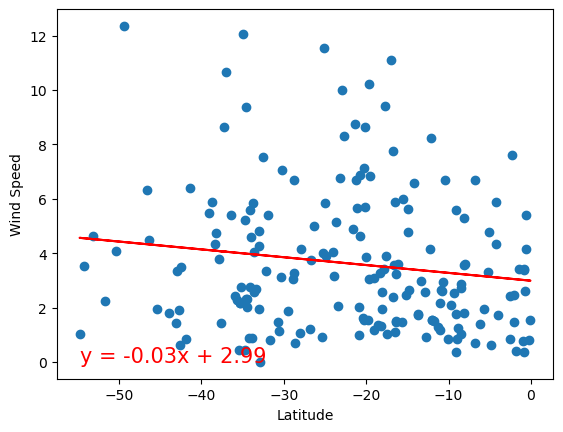

In [61]:
# Southern Hemisphere
# YOUR CODE HERE
x_values_southern = southern_hemi_df['Lat']
y_values_southern = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values_southern, y_values_southern, "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE